In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot, lineplot

# import warnings
# warnings.filterwarnings('ignore')

In [22]:
# set values for new column and based on 'division' column
division_map ={
    '01': 'Food & Beverages',
    '02': 'Alcoholic Beverages & Tobacco',
    '03': 'Clothing & Footwear',
    '04': 'Housing, Utilities & Gas',
    '05': 'Household Furnishing, Equipment & Maintenance ',
    '06': 'Health',
    '07': 'Transport',
    '08': 'Information & Communication',
    '09': 'Recreation, Sport & Culture',
    '10': 'Education',
    '11': 'Restaurant & Accomodation Service',
    '12': 'Insurance & Financial Service',
    '13': 'Personal Care, Social Protection, Miscellaneous Good & Service',
    'overall' : 'Overall'
}

CPI by State & Division (2-digit)

In [21]:
# CPI by State & Division (2-digit)

URL_DATA = 'https://storage.dosm.gov.my/cpi/cpi_2d_state.parquet'

df = pd.read_parquet(URL_DATA)
# if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

df

,state,date,division,index
0,Johor,2010-01-01,overall,99.4
1,Johor,2010-02-01,overall,99.4
2,Johor,2010-03-01,overall,99.4
3,Johor,2010-04-01,overall,99.4
4,Johor,2010-05-01,overall,99.6
...,...,...,...,...
39195,W.P. Putrajaya,2024-03-01,13,124.7
39196,W.P. Putrajaya,2024-04-01,13,125.1
39197,W.P. Putrajaya,2024-05-01,13,127.9
39198,W.P. Putrajaya,2024-06-01,13,127.7


In [4]:
# df_GS01 = df_groupsort_reset[df_groupsort_reset['division']=='01']
# df_GS02 = df_groupsort_reset[df_groupsort_reset['division']=='02']
# df_GS03 = df_groupsort_reset[df_groupsort_reset['division']=='03']

In [23]:
# Add a new column named 'category'
df['category'] = df['division'].map(division_map)

# Convert data types
df['index'] = df['index'].astype('int64')

# Group by state and index
df_G = df.groupby(['state'])[['index']].sum().reset_index()
df_GS = df_G.sort_values(by='index', ascending=True)

df_Gd = df.groupby(['category'])[['index']].sum().reset_index()
df_GdS = df_Gd.sort_values(by='index', ascending=True)

In [24]:
# View grouped division into state and index
df_GdS
df

,state,date,division,index,category
0,Johor,2010-01-01,overall,99,Overall
1,Johor,2010-02-01,overall,99,Overall
2,Johor,2010-03-01,overall,99,Overall
3,Johor,2010-04-01,overall,99,Overall
4,Johor,2010-05-01,overall,99,Overall
...,...,...,...,...,...
39195,W.P. Putrajaya,2024-03-01,13,124,"Personal Care, Social Protection, Miscellaneou..."
39196,W.P. Putrajaya,2024-04-01,13,125,"Personal Care, Social Protection, Miscellaneou..."
39197,W.P. Putrajaya,2024-05-01,13,127,"Personal Care, Social Protection, Miscellaneou..."
39198,W.P. Putrajaya,2024-06-01,13,127,"Personal Care, Social Protection, Miscellaneou..."


Correlation Matrix

In [7]:
# Factorize all column data types to integer

df_GSFactorize = df.apply(lambda x: x.factorize()[0]).corr()
print(df_GSFactorize.corr())
print(df_GSFactorize.unstack())

             state      date  division     index  category
state     1.000000 -0.358230 -0.339557 -0.155731 -0.339557
date     -0.358230  1.000000 -0.566097  0.606166 -0.566097
division -0.339557 -0.566097  1.000000 -0.844946  1.000000
index    -0.155731  0.606166 -0.844946  1.000000 -0.844946
category -0.339557 -0.566097  1.000000 -0.844946  1.000000
state     state       1.000000e+00
          date        1.327084e-16
          division   -5.123975e-15
          index       2.260928e-02
          category   -5.123975e-15
date      state       1.327084e-16
          date        1.000000e+00
          division   -2.767132e-17
          index       4.145894e-01
          category   -2.767132e-17
division  state      -5.123975e-15
          date       -2.767132e-17
          division    1.000000e+00
          index      -2.494897e-01
          category    1.000000e+00
index     state       2.260928e-02
          date        4.145894e-01
          division   -2.494897e-01
          index 

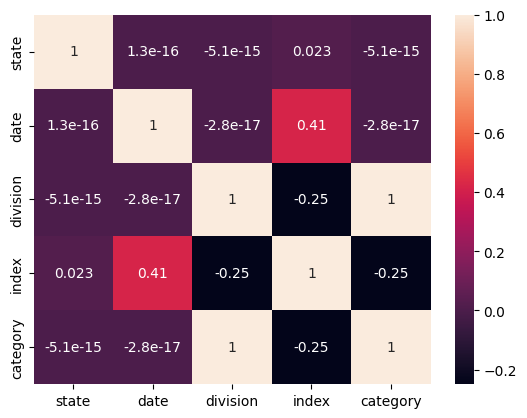

In [8]:
sns.heatmap(df_GSFactorize, annot=True)
plt.show()

In [9]:
# Numerize all column data types to integer
# df_GSNumerize = df

for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

df_GSNumerize = df.corr(method='pearson')
print(df_GSNumerize.corr())
print(df_GSNumerize.unstack())

             state      date  division     index  category
state     1.000000 -0.369686 -0.315579 -0.268366 -0.313100
date     -0.369686  1.000000 -0.569428  0.662576 -0.568912
division -0.315579 -0.569428  1.000000 -0.766897  0.875495
index    -0.268366  0.662576 -0.766897  1.000000 -0.771778
category -0.313100 -0.568912  0.875495 -0.771778  1.000000
state     state       1.000000e+00
          date       -3.249998e-15
          division   -1.683082e-15
          index      -1.670968e-02
          category   -1.014817e-15
date      state      -3.249998e-15
          date        1.000000e+00
          division   -3.799225e-14
          index       4.564882e-01
          category   -2.165356e-14
division  state      -1.683082e-15
          date       -3.799225e-14
          division    1.000000e+00
          index      -1.765592e-01
          category    6.439560e-01
index     state      -1.670968e-02
          date        4.564882e-01
          division   -1.765592e-01
          index 

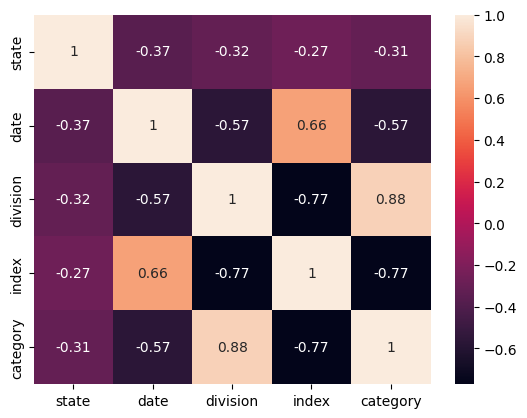

In [10]:
sns.heatmap(df_GSNumerize.corr(), annot = True)
plt.show()

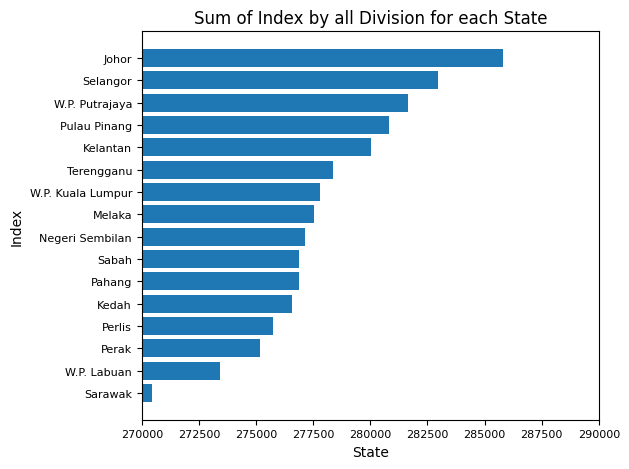

In [84]:
# Sum of Index for all Division by each State

plt.barh(df_GS['state'], df_GS['index'])
plt.title('Sum of Index by all Division for each State')
plt.ylabel('Index')
plt.xlabel('State')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim((270000,290000))
# plt.ylim((270000,290000))
plt.tight_layout()


plt.show()

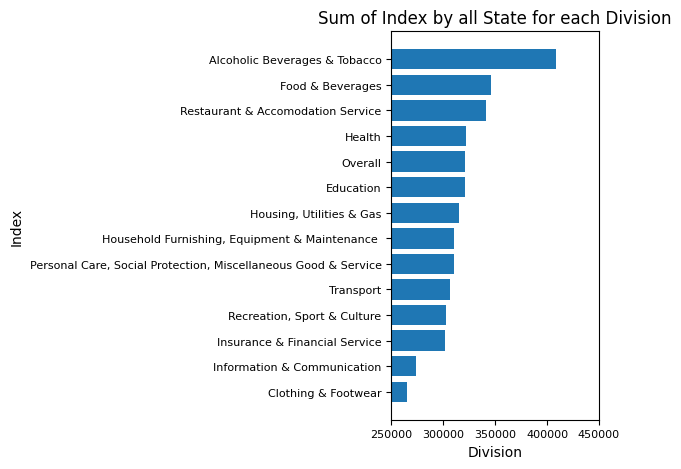

In [93]:
# Sum of Index for all State by each Division

plt.barh(df_GdS['category'], df_GdS['index'])
plt.title('Sum of Index by all State for each Division')
plt.ylabel('Index')
plt.xlabel('Division')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# plt.ylim((200000,300000))
plt.xlim((250000,450000))
plt.tight_layout()

plt.show()

In [14]:
# divisions = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13']
# category
# category = np.unique(df['category'])
# divisions = np.unique(df['division'])
# sorted_ctg = {}
# sorted_dfs = {}

# for ctg in category:
#     df_ctg = df[df['category'] == ctg].sort_values(by='index', ascending=False)
#     sorted_ctg[ctg] = df_ctg
# df_all = pd.concat(sorted_ctg)

# for div in divisions:
#     df_div = df[df['division'] == div].sort_values(by='index', ascending=False)
#     sorted_dfs[div] = df_div
# df_all = pd.concat(sorted_dfs)

# for div in divisions:
#     df_div = df[df['category'] == div]
#     sorted_dfs[div] = df_div
# df_all = pd.concat(sorted_div)

# sorted_dfs['01']

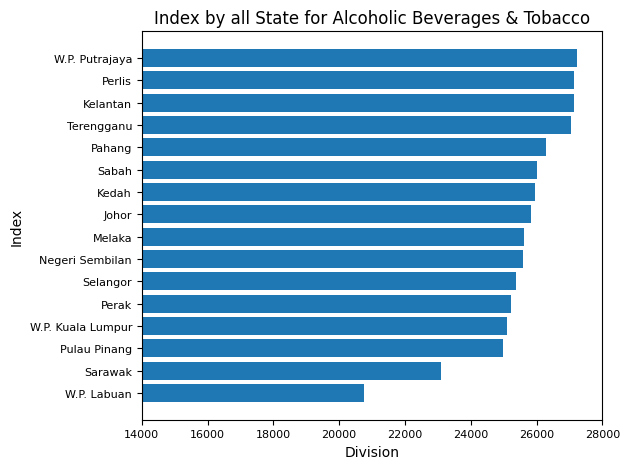

In [131]:
# filter each division
x  = '02'
df_x = df[df['division']==x]
category = division_map.get(x)

# grouped by each division
df_Gx = df_x.groupby(['category','state'])[['index']].sum().reset_index().sort_values(by='index', ascending=True)

# Sum of Index for all State by Division

plt.barh(df_Gx['state'], df_Gx['index'])
plt.title(f'Index by all State for {category}')
plt.ylabel('Index')
plt.xlabel('Division')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim((14000,28000))
plt.tight_layout()

plt.show()

In [365]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [47]:
# df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# df

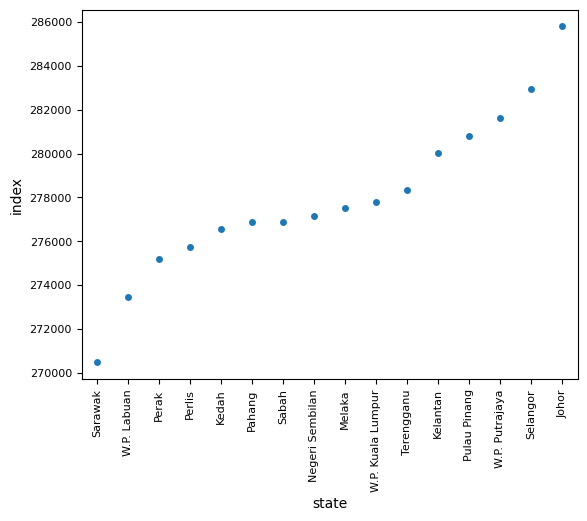

In [115]:
sns.swarmplot(x="state", y="index", data=df_GS)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.show()

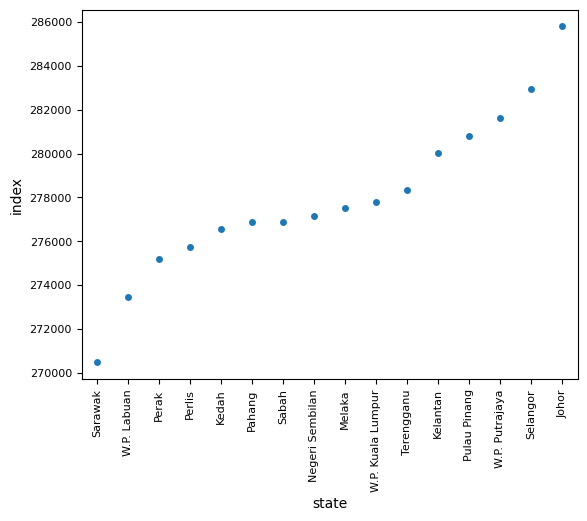

In [116]:
sns.stripplot(x="state", y="index", data=df_GS)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.show()

In [30]:
# df_Grup = df_all.groupby(['state','category','division'])[['index']].sum().reset_index().sort_values(by='index',ascending=True)
# df_Grupall = df_Grup[df_Grup['division']=='overall']

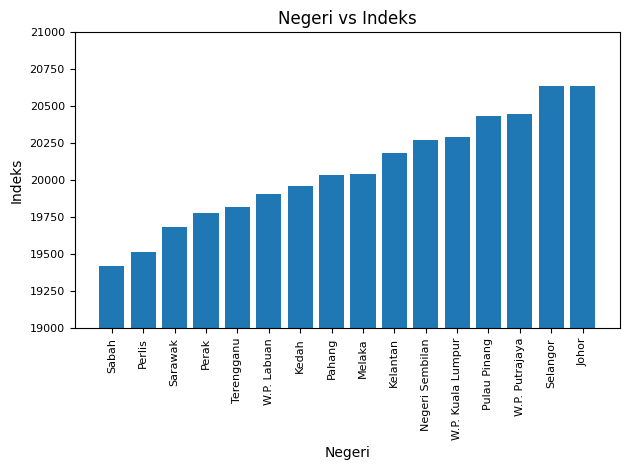

In [31]:
# plt.bar(df_Grupall['state'], df_Grupall['index'])
# plt.title('Negeri vs Indeks')
# plt.ylabel('Indeks')
# plt.xlabel('Negeri')
# plt.xticks(fontsize=8, rotation=90)
# plt.yticks(fontsize=8)
# plt.ylim((19000,21000))
# plt.tight_layout()

# plt.show()

CPI for Low-Income Households by Division (2-digit)

In [143]:
# CPI for Low-Income Households by Division (2-digit)

URL_DATA = 'https://storage.dosm.gov.my/cpi/cpi_2d.parquet'

df2 = pd.read_parquet(URL_DATA)
# if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

df2

,date,division,index
0,2010-01-01,overall,99.4
1,2010-02-01,overall,99.4
2,2010-03-01,overall,99.4
3,2010-04-01,overall,99.4
4,2010-05-01,overall,99.6
...,...,...,...
2445,2024-03-01,13,124.1
2446,2024-04-01,13,125.2
2447,2024-05-01,13,125.6
2448,2024-06-01,13,125.5


In [169]:
# Add a new column named 'category'
df2['category'] = df2['division'].map(division_map)

# Convert data types
df2['index'] = df2['index'].astype('int64')
df2['year'] = df2['date'].astype('str').str[:4]

# Group by date and index
df2_G = df2.groupby(['year'])[['index']].sum().reset_index()
df2_GS = df2_G.sort_values(by='year', ascending=True)

In [157]:
df2.dtypes

date        datetime64[ns]
division            object
index                int64
category            object
year                object
dtype: object

Correlation Matrix

In [159]:
# Factorize all column data types to integer

df2_GSFactorize = df2.apply(lambda x: x.factorize()[0]).corr()
print(df2_GSFactorize.corr())
print(df2_GSFactorize.unstack())

              date  division     index  category      year
date      1.000000 -0.842284  0.724473 -0.842284  0.999995
division -0.842284  1.000000 -0.981769  1.000000 -0.842122
index     0.724473 -0.981769  1.000000 -0.981769  0.724265
category -0.842284  1.000000 -0.981769  1.000000 -0.842122
year      0.999995 -0.842122  0.724265 -0.842122  1.000000
date      date        1.000000e+00
          division   -2.039389e-16
          index       5.246032e-01
          category   -2.039389e-16
          year        9.976833e-01
division  date       -2.039389e-16
          division    1.000000e+00
          index      -2.515587e-01
          category    1.000000e+00
          year        6.850860e-16
index     date        5.246032e-01
          division   -2.515587e-01
          index       1.000000e+00
          category   -2.515587e-01
          year        5.242677e-01
category  date       -2.039389e-16
          division    1.000000e+00
          index      -2.515587e-01
          catego

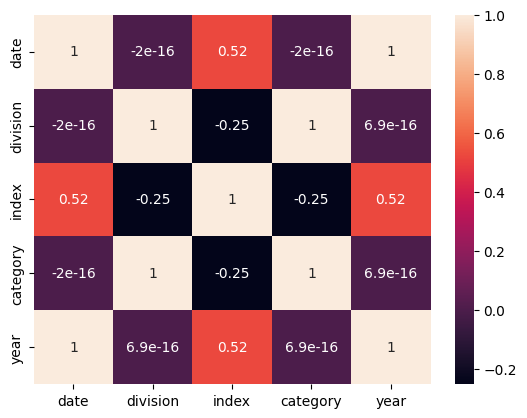

In [160]:
sns.heatmap(df2_GSFactorize, annot=True)
plt.show()

In [161]:
# Numerize all column data types to integer
# df_GSNumerize = df

for col_name in df2.columns:
    if(df2[col_name].dtype == 'object'):
        df2[col_name]= df2[col_name].astype('category')
        df2[col_name] = df2[col_name].cat.codes

df2_GSNumerize = df2.corr(method='pearson')
print(df2_GSNumerize.corr())
print(df2_GSNumerize.unstack())

              date  division     index  category      year
date      1.000000 -0.808762  0.675069 -0.814924  0.999994
division -0.808762  1.000000 -0.942323  0.876480 -0.808233
index     0.675069 -0.942323  1.000000 -0.933243  0.674335
category -0.814924  0.876480 -0.933243  1.000000 -0.814405
year      0.999994 -0.808233  0.674335 -0.814405  1.000000
date      date        1.000000e+00
          division    4.319610e-15
          index       5.009008e-01
          category    3.381116e-15
          year        9.976839e-01
division  date        4.319610e-15
          division    1.000000e+00
          index      -1.970059e-01
          category    6.439560e-01
          year        2.524900e-16
index     date        5.009008e-01
          division   -1.970059e-01
          index       1.000000e+00
          category   -1.807127e-01
          year        4.997946e-01
category  date        3.381116e-15
          division    6.439560e-01
          index      -1.807127e-01
          catego

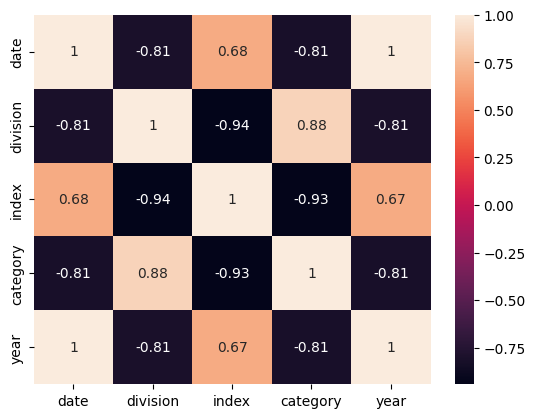

In [162]:
sns.heatmap(df2_GSNumerize.corr(), annot = True)
plt.show()

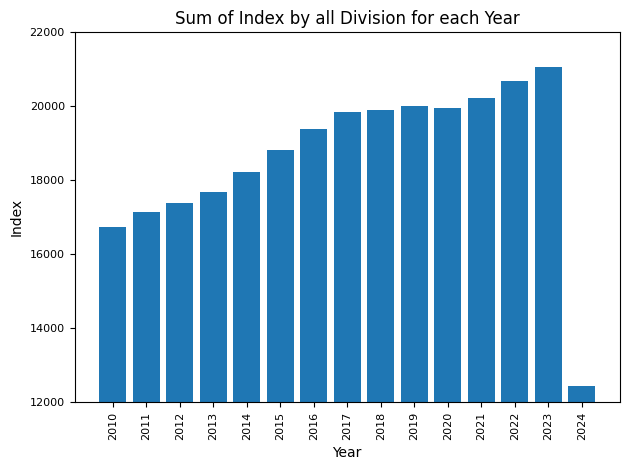

In [212]:
plt.bar(df2_GS['year'], df2_GS['index'])
plt.title('Sum of Index by all Division for each Year')
plt.ylabel('Index')
plt.xlabel('Year')
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.ylim((12000,22000))
plt.tight_layout()

plt.show()

Household Income and Expenditure: Administrative Districts

In [146]:
# Household Income and Expenditure: Administrative Districts

URL_DATA = 'https://storage.dosm.gov.my/hies/hies_district.parquet'

df3 = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])


In [175]:
df3.dtypes

date                 object
state                object
district             object
income_mean           int64
income_median         int64
expenditure_mean      int64
gini                float64
poverty             float64
year                 object
dtype: object

In [238]:
# convert data type
df3['date'] = df3['date'].astype('datetime64[ns]').dt.strftime('%d/%m/%Y')
df3[['gini','poverty']] = round(df3[['gini','poverty']],0)

# add new column
df3['year'] = df3['date'].astype('str').str[6:]

# grouped
df3_G = df3.groupby(['state'])[['income_mean','expenditure_mean','poverty']].sum().reset_index()


In [239]:
df3_G.sort_values(by=['income_mean','expenditure_mean'],ascending=True)

,state,income_mean,expenditure_mean,poverty
7,Perlis,5664,3834,4.0
14,W.P. Labuan,8250,4176,2.0
13,W.P. Kuala Lumpur,13325,7823,1.0
15,W.P. Putrajaya,13473,8897,0.0
3,Melaka,22973,16358,15.0
4,Negeri Sembilan,38397,28004,40.0
8,Pulau Pinang,40839,25998,11.0
2,Kelantan,48882,36207,186.0
12,Terengganu,55868,37513,55.0
5,Pahang,58373,42671,77.0


In [217]:
# df3['poverty meae'] = df3['expenditure_mean']/df3['income_mean']
# df3

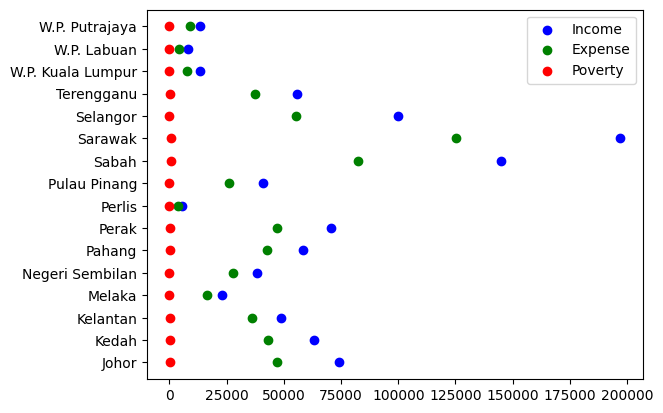

In [240]:
plt.scatter(df3_G['income_mean'], df3_G['state'], label='Income', color='blue')
plt.scatter(df3_G['expenditure_mean'], df3_G['state'], label='Expense', color='green')
plt.scatter(df3_G['poverty'], df3_G['state'], label='Poverty', color='red')
plt.legend()
plt.show()